In [1]:
import os # Operating System library for interacting with the file system
import glob # Library for searching files using patterns
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cPath = './Dataset/'

paths = glob.glob(os.path.join(cPath, '*.jpg'))

In [3]:
orb = cv2.ORB_create()

In [4]:
# Initialize lists to store images and their descriptors
images = []
descriptors = []

for path in paths:
    img = cv2.imread(path, 0)
    kp, des = orb.detectAndCompute(img, None)  # Compute keypoints and descriptors
    images.append(img)
    descriptors.append(des)


In [5]:
descriptors

[array([[ 86, 252, 190, ..., 119,  47,  90],
        [ 49, 148,  75, ..., 138, 210,  56],
        [113, 149,  77, ..., 234, 210,  40],
        ...,
        [ 41, 140, 239, ..., 203, 209, 248],
        [ 56, 181, 233, ..., 250,  86, 251],
        [ 47,  95,  98, ..., 191, 120, 157]], dtype=uint8),
 array([[ 31,  91, 123, ..., 187, 117, 241],
        [ 82, 141, 102, ..., 170, 241, 136],
        [  2, 141, 118, ...,   8, 241, 137],
        ...,
        [ 95, 239, 134, ...,  84, 171, 157],
        [124, 164, 244, ..., 253,  78,   2],
        [124, 160, 252, ..., 168,  78,  34]], dtype=uint8),
 array([[ 27, 203,  98, ..., 142, 245, 220],
        [ 35, 193,  98, ..., 154, 240, 172],
        [ 12, 189, 155, ...,  65, 166, 243],
        ...,
        [ 31,  95, 106, ..., 182, 121, 221],
        [158,  95, 127, ..., 247,  45, 241],
        [191,  29, 236, ..., 253, 220, 247]], dtype=uint8),
 array([[  3, 238, 226, ...,  76, 249, 205],
        [ 18,  56,  18, ...,  44,  47, 199],
        [ 26, 20

In [6]:
# Read the query image
Qimage = cv2.imread('./Dataset/aug_0_949.jpg', 0)

Qkp, Qdes = orb.detectAndCompute(Qimage, None)

In [7]:
# Initialize a dictionary to store distances between query and database images
distances = {}

for idx, des in enumerate(descriptors):
    if des is not None and Qdes is not None and Qdes.shape[1] == des.shape[1]:  # Check if shapes are compatible
        # Compute Hamming distance for binary descriptors
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = bf.match(Qdes, des)
        dist = sum([match.distance for match in matches]) / len(matches)
        distances[paths[idx]] = dist

# Sort the distances
sorted_distances = dict(sorted(distances.items(), key=lambda item: item[1]))

./Dataset\aug_0_949.jpg


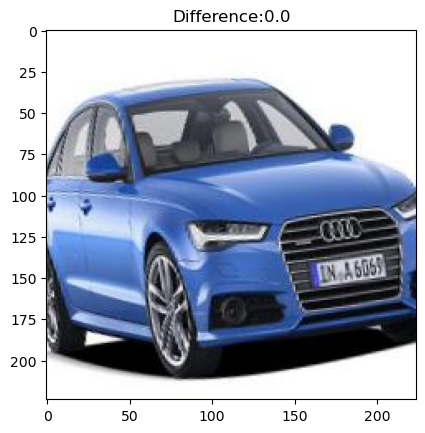

./Dataset\aug_0_514.jpg


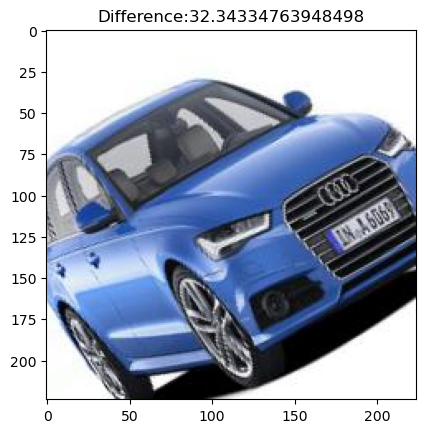

./Dataset\aug_0_4047.jpg


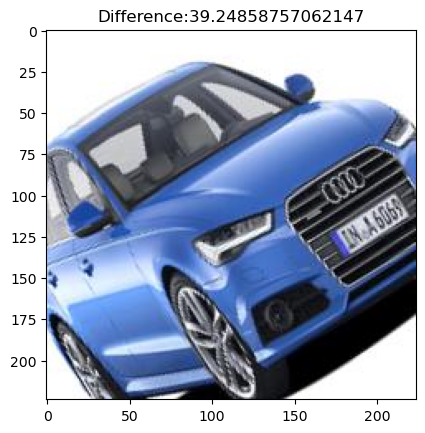

./Dataset\aug_0_2518.jpg


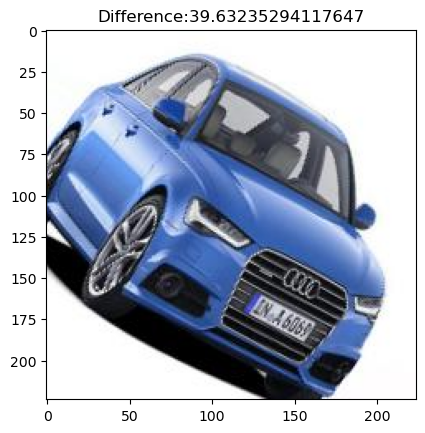

./Dataset\aug_0_4717.jpg


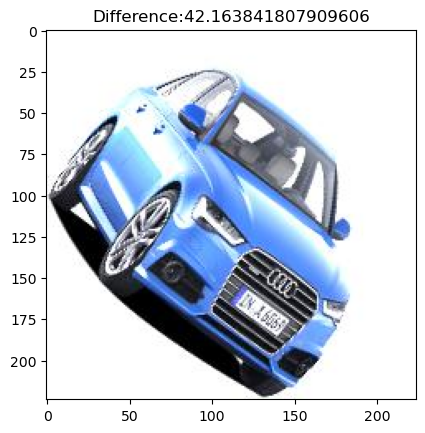

In [8]:
limit = 0
for key, sim in sorted_distances.items():
    path = key
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print(path)
    
    plt.imshow(image)
    plt.title('Difference:' + str(sim))
    plt.show()
    limit += 1
    if limit == 5:
        break